In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.linear_model import LogisticRegression
from pylab import scatter, show, legend, xlabel, ylabel

In [2]:
# this script is used to generate a set of random data points for classification problems. 


def getDataSet():
    """
    Returns X (250 X 2) and Y (250 X 1)
    """
    # Step 1: Generate data by a module
    n = 100  # 1st class contains N objects
    alpha = 1.5  # 2st class contains alpha*N ones
    sig2 = 1  # assume 2nd class has the same variance as the 1st
    dist2 = 4

    # later we move this piece of code in a separate file
    # [X, y] = loadModelData(N, alpha, sig2, dist2);
    n2 = math.floor(alpha * n)  # calculate the size of the 2nd class
    cls1X = np.random.randn(n, 2)  # generate random objects of the 1st class

    # generate a random distance from the center of the 1st class to the center of the 2nd
    # https://stackoverflow.com/questions/1721802/what-is-the-equivalent-of-matlabs-repmat-in-numpy
    a = np.array([[math.sin(math.pi * random.random()), math.cos(math.pi * random.random())]])
    a1 = a * dist2
    shiftClass2 = np.kron(np.ones((n2, 1)), a1)

    # generate random objects of the 2nd class
    cls2X = sig2 * np.random.randn(n2, 2) + shiftClass2
    # combine the objects
    X = np.concatenate((cls1X, cls2X), axis=0)

    # assign class labels: 0s and 1s
    y = np.concatenate((np.zeros((cls1X.shape[0], 1)), np.ones((cls2X.shape[0], 1))), axis=0)
    # end % of module.
    return X, y


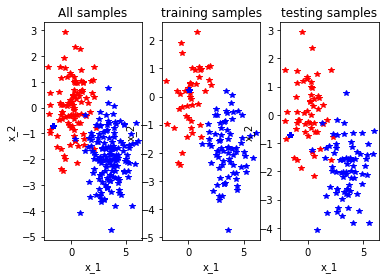

In [64]:
# step 1: generate dataset that includes both positive and negative samples,
# where each sample is described with two features.
# 250 samples in total.

[X, y] = getDataSet()  # note that y contains only 1s and 0s,

# create figure for all charts to be placed on so can be viewed together
fig = plt.figure()


def func_DisplayData(dataSamplesX, dataSamplesY, chartNum, titleMessage):
    idx1 = (dataSamplesY == 0).nonzero()  # object indices for the 1st class
    idx2 = (dataSamplesY == 1).nonzero()
    ax = fig.add_subplot(1, 3, chartNum)
    # no more variables are needed
    plt.plot(dataSamplesX[idx1, 0], dataSamplesX[idx1, 1], 'r*')
    plt.plot(dataSamplesX[idx2, 0], dataSamplesX[idx2, 1], 'b*')
    # axis tight
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_title(titleMessage)


# plotting all samples
func_DisplayData(X, y, 1, 'All samples')
# number of training samples
nTrain = 120

######################PLACEHOLDER 1#start#########################
# write you own code to randomly pick up nTrain number of samples for training and use the rest for testing.
# WARNIN: 

maxIndex = len(X)
randomTrainingSamples = np.random.choice(maxIndex, nTrain, replace=False)
testRandomSamples = list(set(range(250)) - set(randomTrainingSamples))
trainX = X[randomTrainingSamples,]   #  training samples
trainY = y[randomTrainingSamples,] # labels of training samples    nTrain X 1
 
testX =  X[testRandomSamples,] # testing samples               
testY =  y[testRandomSamples,] # labels of testing samples     nTest X 1

####################PLACEHOLDER 1#end#########################

# plot the samples you have pickup for training, check to confirm that both negative
# and positive samples are included.
func_DisplayData(trainX, trainY, 2, 'training samples')
func_DisplayData(testX, testY, 3, 'testing samples')

# show all charts
plt.savefig("figure.jpg")
plt.show()


In [4]:
#  step 2: train logistic regression models


######################PLACEHOLDER2 #start#########################
# in this placefolder you will need to train a logistic model using the training data: trainX, and trainY.
# please delete these coding lines and use the sample codes provided in the folder "codeLogit"
#############################sklearn api##########################
# use sklearn class
clf = LogisticRegression()
# call the function fit() to train the class instance
clf.fit(trainX,trainY)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
#############################self-developed#########################
# util.py
##implementation of sigmoid function
def Sigmoid(x):
	g = float(1.0 / float((1.0 + math.exp(-1.0*x))))
	return g

##Prediction function
def Prediction(theta, x):
	z = 0
	for i in range(len(theta)):
		z += x[i]*theta[i]
	return Sigmoid(z)


# implementation of cost functions
def Cost_Function(X,Y,theta,m):
	sumOfErrors = 0
	for i in range(m):
		xi = X[i]
		est_yi = Prediction(theta,xi)
		if Y[i] == 1:
			error = Y[i] * math.log(est_yi)
		elif Y[i] == 0:
			error = (1-Y[i]) * math.log(1-est_yi)
		sumOfErrors += error
	const = -1/m
	J = const * sumOfErrors
	#print 'cost is ', J 
	return J

 
# gradient components called by Gradient_Descent()

def Cost_Function_Derivative(X,Y,theta,j,m,alpha):
	sumErrors = 0
	for i in range(m):
		xi = X[i]
		xij = xi[j]
		hi = Prediction(theta,X[i])
		error = (hi - Y[i])*xij
		sumErrors += error
	m = len(Y)
	constant = float(alpha)/float(m)
	J = constant * sumErrors
	return J

# execute gradient updates over thetas
def Gradient_Descent(X,Y,theta,m,alpha):
	new_theta = []
	constant = alpha/m
	for j in range(len(theta)):
		deltaF = Cost_Function_Derivative(X,Y,theta,j,m,alpha)
		new_theta_value = theta[j] - deltaF
		new_theta.append(new_theta_value)
	return new_theta



In [6]:
theta = [0,0] #initial model parameters
alpha = 0.1 # learning rates
max_iteration = 1000 # maximal iterations


m = len(trainY) # number of samples

for x in range(max_iteration):
	# call the functions for gradient descent method
	new_theta = Gradient_Descent(trainX,trainY,theta,m,alpha)
	theta = new_theta
	if x % 200 == 0:
		# calculate the cost function with the present theta
		Cost_Function(trainX,trainY,theta,m)
		print ('theta ', theta)	
		print ('cost is ', Cost_Function(trainX,trainY,theta,m))

score = 0
for i in range(m):
    prediction = round(Prediction(trainX[i],theta))
    answer = trainY[i]
    if prediction == answer:
        score += 1

    
my_score = float(score) / float(m)
print ('score self developed: ', my_score)
print('score Scikit learn: ', clf.score(trainX,trainY))
######################PLACEHOLDER2 #end #########################

theta  [array([0.12227244]), array([0.0908968])]
cost is  [0.50725172]
theta  [array([0.87823914]), array([0.16037821])]
cost is  [0.31036896]
theta  [array([0.93316495]), array([0.11439487])]
cost is  [0.31005111]
theta  [array([0.94298799]), array([0.10644864])]
cost is  [0.3100413]
theta  [array([0.94475761]), array([0.1050261])]
cost is  [0.31004098]
score self developed:  0.7916666666666666
score Scikit learn:  1.0


In [11]:
######################PLACEHOLDER3 #start#########################
###########sklean api########
testY_sklearn = clf.predict(testX)
print(testY_sklearn)
testY_selfdevelop = np.zeros(len(testY))
for i in range(len(testY)):
    testY_selfdevelop[i] = round(Prediction(testX[i],theta))
print(testY_selfdevelop)
#PLACEHOLDER#end
len(testY_sklearn)

[0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.]
[0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


120

In [8]:
# step 4: evaluation
# compare predictions yHat and and true labels testy to calculate average error and standard deviation
testYDiff_skearn = np.abs(testY_sklearn - testY)
testYDiff_selfdevelop = np.abs(testY_selfdevelop - testY)
avgErr_sklearn = np.mean(testYDiff_skearn)
stdErr_sklearn = np.std(testYDiff_skearn)
avgErr_selfdevelop = np.mean(testYDiff_selfdevelop)
stdErr_selfdevelop = np.std(testYDiff_selfdevelop)

print(f'average error of sklearn model: {avgErr_sklearn} ({stdErr_sklearn}')
print(f'average error of self developed model: {avgErr_selfdevelop} ({stdErr_selfdevelop})')


average error of sklearn model: 0.48 (0.49959983987187184
average error of self developed model: 0.44 (0.49638694583963433)


In [9]:
def func_calConfusionMatrix(predY, trueY):
    class_num = len(np.unique(predY))
    c_mat = np.zeros(class_num**2).reshape((class_num,class_num))
    for i in range(class_num):
        for j in range(class_num):
            c_mat[i,j] = np.sum((trueY.T == i)&( predY == j ).astype(int))
    accuracy = np.sum(c_mat.diagonal()) / len(predY)
    precision,recall = np.zeros(class_num),np.zeros(class_num)
    for m in range(class_num):
        precision[m] = float(c_mat.diagonal()[m] / np.sum(c_mat[:,m]))
        recall[m] = float(c_mat.diagonal()[m] / np.sum(c_mat[m,]))
    return [c_mat,accuracy,precision,recall]

In [10]:
c_mat_sklearn = func_calConfusionMatrix(predY = testY_sklearn, trueY = testY)
c_mat_selfdevelop = func_calConfusionMatrix(predY = testY_selfdevelop, trueY = testY)
print(f'for sklearn model accuracy is {c_mat_sklearn[1]}, precision for 0 and 1 is {c_mat_sklearn[2]}, recall for 0 and 1  is {c_mat_sklearn[3]}')
print(f'for self-developed model accuracy is {c_mat_selfdevelop[1]}, precision for 0 and 1 is {c_mat_selfdevelop[2]}, recall for 0 and 1 is {c_mat_selfdevelop[3]}')

for sklearn model accuracy is 1.0, precision for 0 and 1 is [1. 1.], recall for 0 and 1  is [1. 1.]
for self-developed model accuracy is 0.8, precision for 0 and 1 is [1.   0.75], recall for 0 and 1 is [0.5 1. ]


In [227]:
print(f'for sklearn model, confusion matrix is {c_mat_sklearn[0]}')
print(f'for self-developed model, confusion matrix is {c_mat_selfdevelop[0]}')


for sklearn model, confusion matrix is [[49.  0.]
 [ 1. 70.]]
for self-developed model, confusion matrix is [[23. 26.]
 [ 0. 71.]]
